In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_squared_error,r2_score
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
iris=load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
56,6.3,3.3,4.7,1.6
45,4.8,3.0,1.4,0.3
136,6.3,3.4,5.6,2.4
13,4.3,3.0,1.1,0.1
129,7.2,3.0,5.8,1.6
...,...,...,...,...
107,7.3,2.9,6.3,1.8
23,5.1,3.3,1.7,0.5
146,6.3,2.5,5.0,1.9
32,5.2,4.1,1.5,0.1


In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

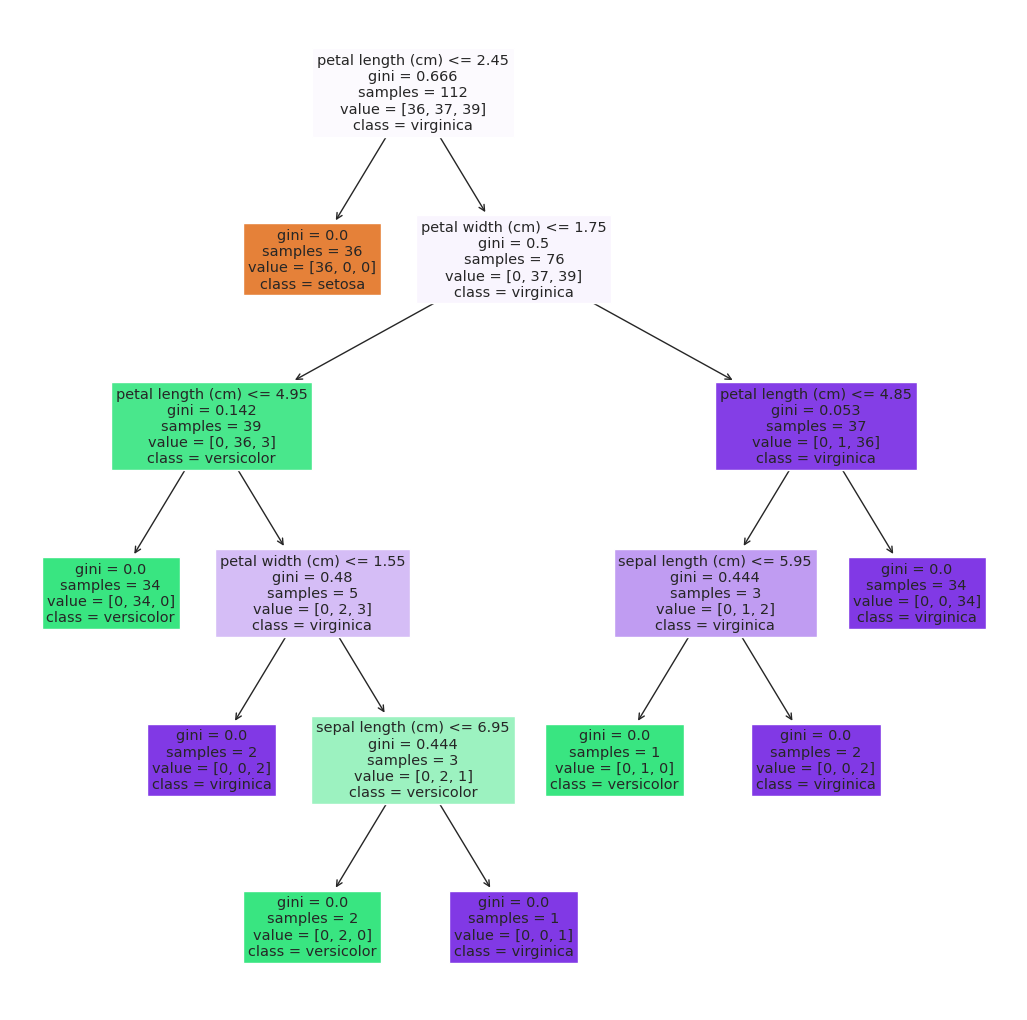

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(13,13))
_ = tree.plot_tree(model,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [ ]:
y_test

['setosa', 'virginica', 'versicolor', 'setosa', 'virginica', ..., 'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa']
Length: 38
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [ ]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 10]])

In [ ]:
df=pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

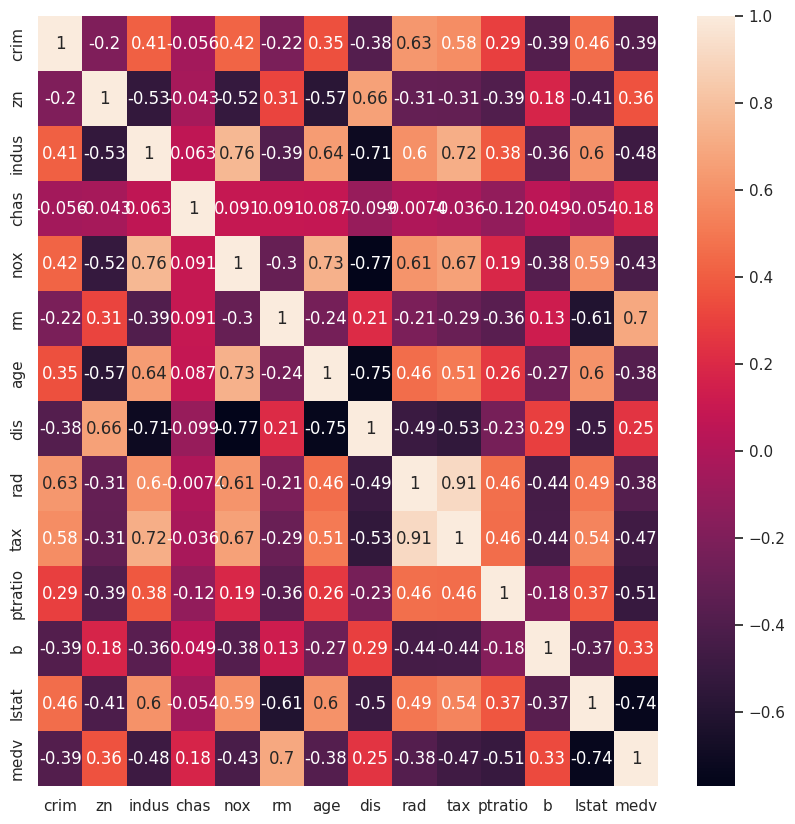

In [ ]:
sns.set (rc = {'figure.figsize':(10, 10)})
sns.heatmap(data=df.corr(),annot=True)

<Axes: xlabel='rm'>

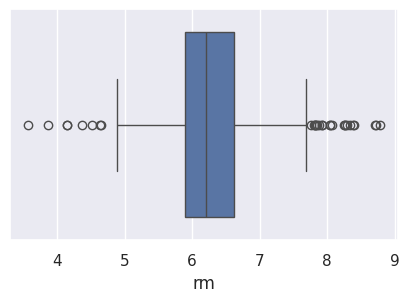

In [ ]:
sns.set (rc = {'figure.figsize':(5, 3)})
sns.boxplot(x=df['rm'])

In [ ]:
X=df.drop(['medv','crim','indus','nox','age','rad','tax','ptratio','lstat','chas'],axis=1)
y=df['medv']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,zn,rm,dis,b
313,0.0,6.266,3.2628,393.39
299,70.0,7.041,7.8278,371.58
196,80.0,7.287,7.3090,396.90
297,0.0,5.790,6.3200,396.90
383,0.0,5.520,1.5331,396.90
...,...,...,...,...
160,0.0,6.250,1.7984,338.92
408,0.0,5.617,1.4547,314.64
357,0.0,6.395,2.5052,391.34
433,0.0,6.436,2.3158,100.19


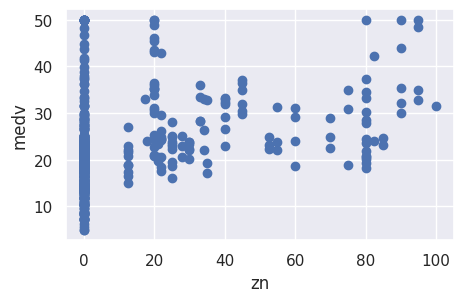

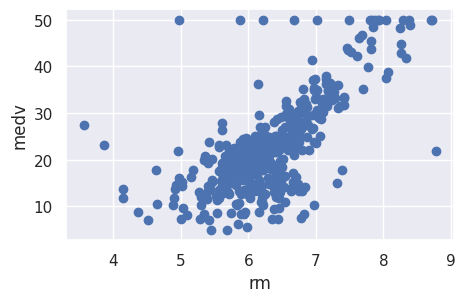

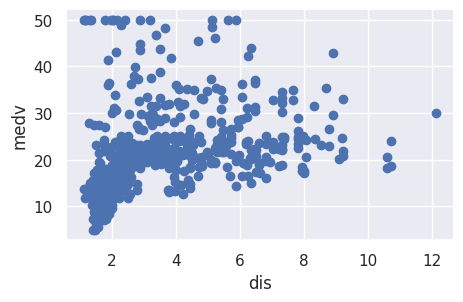

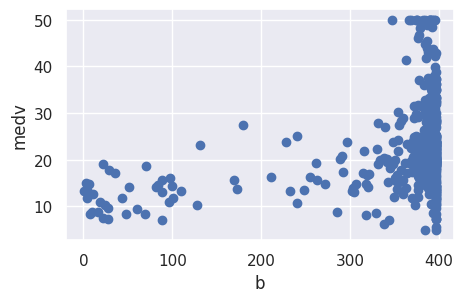

In [ ]:
for i in X.columns:
  plt.scatter(X[i],df['medv'])
  plt.xlabel(i)
  plt.ylabel("medv")
  plt.show()

In [ ]:
m1=DecisionTreeRegressor()
m1.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=m1.predict(X_test)
y_pred

array([25. , 13.1, 20.1, 16.6, 11.5, 23.2, 23.8, 32. , 19.5, 22. , 17.4,
       24.8, 30.8, 11.5, 18.9, 22.3, 19.9, 18.5, 23.1, 14.5, 24.1, 50. ,
       16.1, 13.1, 20.5, 20.6, 18.4, 18.4, 31.5, 21. , 23.9,  8.8, 25.3,
       18.4, 19.4, 21.9, 20.1, 19.8, 12.8, 24.7, 15.6, 19.7, 18. , 50. ,
       25. , 24.6, 27.5, 27.5, 28.7, 36.4, 37.9, 30.5, 48.3, 19.1, 24. ,
       35.2, 12.8, 25. , 31.7, 27.5, 18.7,  7.2, 14.6, 29.9, 50. , 22.2,
       18.5, 29.4, 22.7, 31.5, 21.4, 27.1, 50. , 24.7, 17.2, 22.7, 21.9,
       50. , 27.5, 22.2, 21.2, 27.1, 37.9, 20.6, 21.2, 12.7, 23.2, 27.1,
       18.9, 20.5, 14.6, 23.9, 23.1, 36.1, 24.6, 15.2, 11.7, 50. ,  5. ,
       19.4, 29.6, 21.2])

In [ ]:
print("MAE :",mean_squared_error(y_test,y_pred,squared=False))
print("MSE :",mean_squared_error(y_test,y_pred))
print("R2 :",r2_score(y_test,y_pred))

MAE : 8.326999553778506
MSE : 69.33892156862746
R2 : 0.1672464141256752


In [ ]:
m2=LinearRegression()
m2.fit(X_train,y_train)
y_pred=m2.predict(X_test)

In [ ]:
print("MAE :",mean_squared_error(y_test,y_pred,squared=False))
print("MSE :",mean_squared_error(y_test,y_pred))
print("R2 :",r2_score(y_test,y_pred))

MAE : 5.215767835004246
MSE : 27.204234108664878
R2 : 0.6732798406370754


In [ ]:
m3=SVR()
m3.fit(X_train,y_train)
y_pred=m3.predict(X_test)

In [ ]:
print("MAE :",mean_squared_error(y_test,y_pred,squared=False))
print("MSE :",mean_squared_error(y_test,y_pred))
print("R2 :",r2_score(y_test,y_pred))

MAE : 8.590003322874782
MSE : 73.78815708699979
R2 : 0.11381153587108805


In [ ]:
m4=RandomForestRegressor()
m4.fit(X_train,y_train)
y_pred=m4.predict(X_test)

In [ ]:
print("MAE :",mean_squared_error(y_test,y_pred,squared=False))
print("MSE :",mean_squared_error(y_test,y_pred))
print("R2 :",r2_score(y_test,y_pred))

MAE : 5.270521281470303
MSE : 27.778394578431357
R2 : 0.6663842302172898


In [ ]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
y = pd.Categorical(y)
#y=pd.get_dummies(y)
type(y)

pandas.core.arrays.categorical.Categorical

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
m6=SVC()
m6.fit(X_train,y_train)
y_pred=m6.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9473684210526315